In [1]:
import 定日镜光学效率 as eff
import pandas as pd
import numpy as np
import test_multi
import e_mirror_rate as emr

In [2]:
#读取 附件.xlsx 中的数据
df = pd.read_excel('附件.xlsx',header=0)
df.head()

,x坐标 (m),y坐标 (m)
0,107.250,11.664
1,105.360,23.191
2,102.235,34.447
3,97.911,45.299
4,92.440,55.619


In [3]:
#加入额外数据
#安装高度
df['安装高度z'] = 4
#尺寸
df['尺寸长l'] = 6
df['尺寸宽w'] = 6

df.head()

,x坐标 (m),y坐标 (m),安装高度z,尺寸长l,尺寸宽w
0,107.250,11.664,4,6,6
1,105.360,23.191,4,6,6
2,102.235,34.447,4,6,6
3,97.911,45.299,4,6,6
4,92.440,55.619,4,6,6


In [4]:
#转换为nddarray
mirrors = df.values
mirrors

array([[107.25 ,  11.664,   4.   ,   6.   ,   6.   ],
       [105.36 ,  23.191,   4.   ,   6.   ,   6.   ],
       [102.235,  34.447,   4.   ,   6.   ,   6.   ],
       ...,
       [334.636, -40.95 ,   4.   ,   6.   ,   6.   ],
       [336.233, -24.609,   4.   ,   6.   ,   6.   ],
       [337.032,  -8.21 ,   4.   ,   6.   ,   6.   ]])

## 计算效率

In [5]:

result_matrix = test_multi.range_result(mirrors[:, 0:2],8)
#print(result_matrix)

In [20]:

Day=0
hour=15
phi=39.2*np.pi/180

ps,tal,per=eff.E_field(mirrors,result_matrix,Day,hour,phi,3)

print("总功率",tal)
print("单位面积功率",per)


传入的坐标： [[109.73321073   8.95782009   6.12373604]
 [105.5298144    8.41889495   1.87626396]
 [104.76678927  14.37017991   1.87626396]
 [108.9701856   14.90910505   6.12373604]]
投影后坐标 [[ 0.31989828 -2.94145149 83.65671269]
 [ 0.32868872 -3.02227922 76.424381  ]
 [-0.31989828  2.94145149 76.34328731]
 [-0.32868872  3.02227922 83.575619  ]]
旋转后的投影坐标 [[ 1.84852134e-14 -2.95879566e+00  8.36567127e+01]
 [ 1.37667655e-14 -3.04009999e+00  7.64243810e+01]
 [ 1.01585407e-14  2.95879566e+00  7.63432873e+01]
 [ 5.55111512e-16  3.04009999e+00  8.35756190e+01]]
points [[-2.95879566  3.65671269]
 [-3.04009999 -3.575619  ]
 [ 2.95879566 -3.65671269]
 [ 3.04009999  3.575619  ]]
afterpoint [[-3.57322483  4.28654574]
 [-3.66850118 -4.18865134]
 [ 3.57322483 -4.28654574]
 [ 3.66850118  4.18865134]]
marea: 43.39259640830331 cut_area 43.39259640830332
oarea: 61.38438211662134 cut_area 56.0
第 0 个镜子效率: {'eta': 0.5462667540754169, 'eta_cos': 0.6246616581370437, 'eta_at': 0.9780340506043553, 'eta_trunc': 0.97189

In [21]:

#找到功率最小的镜子
min_index = np.argmin(ps)
print("最小功率镜子",min_index,ps[min_index],mirrors[min_index])


最小功率镜子 747 0.012357407073688537 [114.625 198.536   4.      6.      6.   ]


# 画图

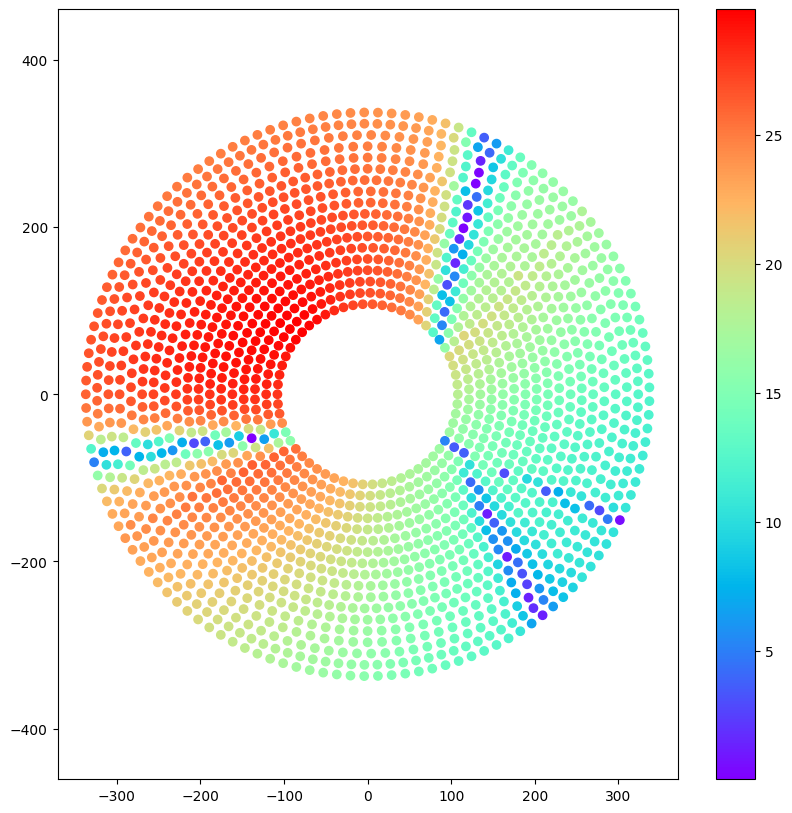

In [22]:
#import seaborn as sns
import matplotlib.pyplot as plt

#绘制功率密度图
#按镜子x,y坐标画出功率密度图
#x,y坐标
x = mirrors[:,0]
y = mirrors[:,1]
#功率密度
ps = ps
#绘图
plt.figure(figsize=(10,10))
plt.scatter(x,y,c=ps,cmap='rainbow')
plt.colorbar()
#等比
plt.axis('equal')
plt.show()
